# Perbandingan Metrik Evaluasi Clustering


Dua metrik yang digunakan untuk evaluasi model dari masing-masing metode K-Means, Hierarchical, dan DBSCAN:

- **Silhouette Score**: Mengukur seberapa mirip suatu objek dengan klasternya sendiri dibandingkan dengan klaster lain. Semakin tinggi skornya (maksimum 1), semakin baik klasterisasi.
- **Davies-Bouldin Index (DBI)**: Mengukur rata-rata kesamaan antar klaster. Semakin rendah nilai DBI, semakin baik pemisahan antar klaster.


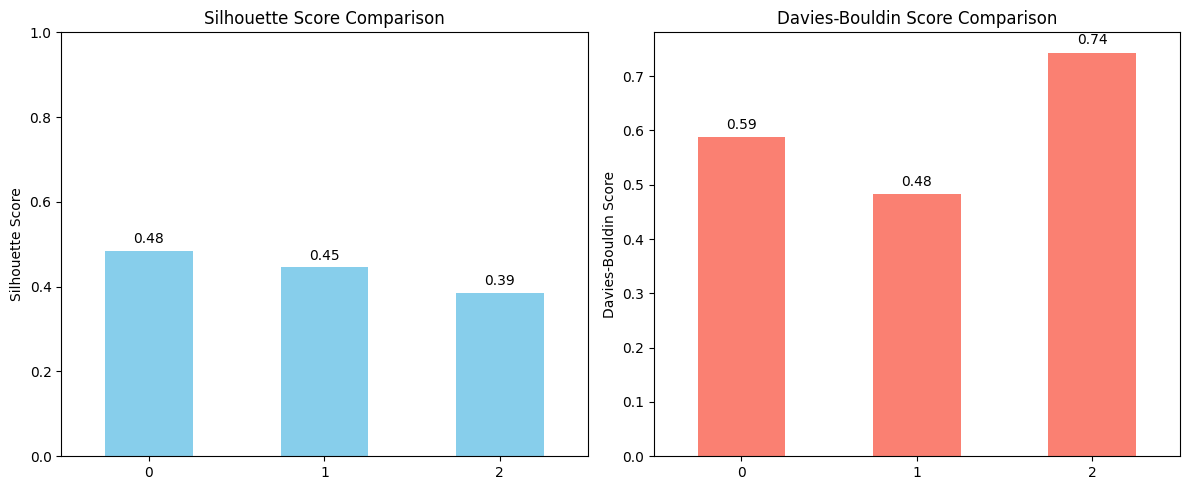

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
import joblib

# --- Load dataset ---
case_data = pd.read_csv("../Dataset/data_normalized.csv")

# --- Ambil fitur untuk clustering ---
X_scaled = case_data[['Jumlah_Murid_SMA', 'PDRB_harga_konstan']]

# --- Load semua model dengan joblib ---
kmeans_model = joblib.load('../Clustering/K_Means/model/model_k3.pkl')
agglo_model = joblib.load('../Clustering/Hierarchical/model/model_agglo_k3.pkl')
dbscan_model = joblib.load('../Clustering/DBSCAN/model/model_dbscan.joblib')

# --- Prediksi label ---
labels_kmeans = kmeans_model.predict(X_scaled)
labels_agglo = agglo_model.fit_predict(X_scaled)
labels_dbscan = dbscan_model.fit_predict(X_scaled)

# --- Evaluasi Clustering ---
results = {
    'Model': ['KMeans', 'Agglomerative', 'DBSCAN'],
    'Silhouette Score': [],
    'Davies-Bouldin Score': []
}

# Hitung skor evaluasi untuk setiap model
for labels in [labels_kmeans, labels_agglo, labels_dbscan]:
    if len(np.unique(labels)) > 1 and len(set(labels)) != 1:
        sil_score = silhouette_score(X_scaled, labels)
        db_score = davies_bouldin_score(X_scaled, labels)
    else:
        sil_score = np.nan
        db_score = np.nan
    results['Silhouette Score'].append(sil_score)
    results['Davies-Bouldin Score'].append(db_score)

# --- Buat DataFrame hasil evaluasi ---
df_results = pd.DataFrame(results)

# --- Plot hasil evaluasi ---
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Silhouette Score
df_results['Silhouette Score'].plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Silhouette Score Comparison')
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Silhouette Score')
ax[0].tick_params(axis='x', rotation=0)
for i, v in enumerate(df_results['Silhouette Score']):
    if pd.notnull(v):
        ax[0].text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Plot Davies-Bouldin Score
df_results['Davies-Bouldin Score'].plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('Davies-Bouldin Score Comparison')
ax[1].set_ylabel('Davies-Bouldin Score')
ax[1].tick_params(axis='x', rotation=0)
for i, v in enumerate(df_results['Davies-Bouldin Score']):
    if pd.notnull(v):
        ax[1].text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**Kesimpulan :**

Berdasarkan hasil evaluasi menggunakan dua metrik utama, yaitu **Silhouette Score** dan **Davies-Bouldin Index**, diperoleh bahwa model **K-Means** menunjukkan performa paling konsisten dan optimal dalam mengelompokkan data. K-Means menghasilkan nilai *Silhouette Score* tertinggi dan nilai *Davies-Bouldin Index* yang relatif rendah, yang menandakan bahwa objek-objek dalam klaster memiliki kemiripan tinggi antar anggota klaster, serta pemisahan yang jelas antar klaster.

Dengan demikian, **K-Means** direkomendasikan sebagai pendekatan utama untuk pembagian klaster pada kasus ini.